# Eksperimen Machine Learning - Transactions Dataset
## David Dewanto

Notebook ini berisi eksperimen lengkap untuk:
1. Data Loading
2. Exploratory Data Analysis (EDA)
3. Data Preprocessing

Dataset: Transactions (Fraud Detection)

## 1. Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Set style for visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Data Loading

In [5]:
# Load raw dataset
df_raw = pd.read_csv('../transactions.csv')

print("Dataset loaded successfully!")
print(f"Shape: {df_raw.shape}")
print(f"\nFirst 5 rows:")
df_raw.head()

Dataset loaded successfully!
Shape: (299695, 17)

First 5 rows:


,transaction_id,user_id,account_age_days,total_transactions_user,avg_amount_user,amount,country,bin_country,channel,merchant_category,promo_used,avs_match,cvv_result,three_ds_flag,transaction_time,shipping_distance_km,is_fraud
0,1,1,141,47,147.93,84.75,FR,FR,web,travel,0,1,1,1,2024-01-06T04:09:39Z,370.95,0
1,2,1,141,47,147.93,107.90,FR,FR,web,travel,0,0,0,0,2024-01-09T20:13:47Z,149.62,0
2,3,1,141,47,147.93,92.36,FR,FR,app,travel,1,1,1,1,2024-01-12T06:20:11Z,164.08,0
3,4,1,141,47,147.93,112.47,FR,FR,web,fashion,0,1,1,1,2024-01-15T17:00:04Z,397.40,0
4,5,1,141,47,147.93,132.91,FR,US,web,electronics,0,1,1,1,2024-01-17T01:27:31Z,935.28,0


In [6]:
# Dataset information
print("Dataset Information:")
print("="*50)
df_raw.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299695 entries, 0 to 299694
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   transaction_id           299695 non-null  int64  
 1   user_id                  299695 non-null  int64  
 2   account_age_days         299695 non-null  int64  
 3   total_transactions_user  299695 non-null  int64  
 4   avg_amount_user          299695 non-null  float64
 5   amount                   299695 non-null  float64
 6   country                  299695 non-null  object 
 7   bin_country              299695 non-null  object 
 8   channel                  299695 non-null  object 
 9   merchant_category        299695 non-null  object 
 10  promo_used               299695 non-null  int64  
 11  avs_match                299695 non-null  int64  
 12  cvv_result               299695 non-null  int64  
 13  three_ds_flag            299695 non-nu

In [7]:
# Statistical summary
print("Statistical Summary:")
print("="*50)
df_raw.describe()

Statistical Summary:


,transaction_id,user_id,account_age_days,total_transactions_user,avg_amount_user,amount,promo_used,avs_match,cvv_result,three_ds_flag,shipping_distance_km,is_fraud
count,299695.0000,299695.000000,299695.000000,299695.000000,299695.000000,299695.000000,299695.000000,299695.000000,299695.000000,299695.000000,299695.000000,299695.000000
mean,149848.0000,3002.559432,973.397871,50.673321,148.142973,177.165279,0.153640,0.837999,0.872110,0.784588,357.049028,0.022062
std,86514.6388,1732.309663,525.241409,5.976391,200.364624,306.926507,0.360603,0.368453,0.333968,0.411109,427.672074,0.146887
min,1.0000,1.000000,1.000000,40.000000,3.520000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74924.5000,1501.000000,516.000000,46.000000,46.190000,42.100000,0.000000,1.000000,1.000000,1.000000,136.600000,0.000000
50%,149848.0000,3007.000000,975.000000,51.000000,90.130000,89.990000,0.000000,1.000000,1.000000,1.000000,273.020000,0.000000
75%,224771.5000,4504.000000,1425.000000,56.000000,173.450000,191.110000,0.000000,1.000000,1.000000,1.000000,409.180000,0.000000
max,299695.0000,6000.000000,1890.000000,60.000000,4565.290000,16994.740000,1.000000,1.000000,1.000000,1.000000,3748.560000,1.000000


## 3. Exploratory Data Analysis (EDA)

### 3.1 Check Missing Values

In [10]:
# Check missing values
missing_values = df_raw.isnull().sum()
print("Missing Values:")
print("="*50)
print(missing_values)
print(f"\nTotal missing values: {missing_values.sum()}")

Missing Values:
transaction_id             0
user_id                    0
account_age_days           0
total_transactions_user    0
avg_amount_user            0
amount                     0
country                    0
bin_country                0
channel                    0
merchant_category          0
promo_used                 0
avs_match                  0
cvv_result                 0
three_ds_flag              0
transaction_time           0
shipping_distance_km       0
is_fraud                   0
dtype: int64

Total missing values: 0


### 3.2 Check Duplicates

In [12]:
# Check duplicates
duplicates = df_raw.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    print("\nDuplicate rows:")
    print(df_raw[df_raw.duplicated()])

Number of duplicate rows: 0


### 3.3 Target Distribution

Fraud Distribution:
is_fraud
0    293083
1      6612
Name: count, dtype: int64

Percentage:
is_fraud
0    97.793757
1     2.206243
Name: proportion, dtype: float64


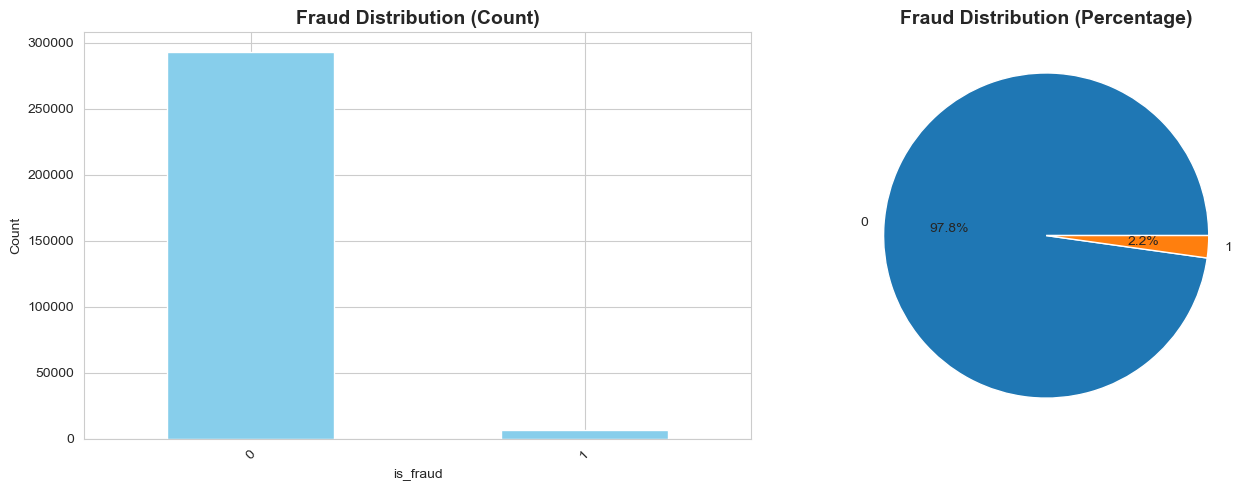

In [14]:
# Target distribution
print("Fraud Distribution:")
print("="*50)
print(df_raw['is_fraud'].value_counts())
print(f"\nPercentage:")
print(df_raw['is_fraud'].value_counts(normalize=True) * 100)

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
df_raw['is_fraud'].value_counts().plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Fraud Distribution (Count)', fontsize=14, fontweight='bold')
ax1.set_xlabel('is_fraud')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=45)

# Pie chart
df_raw['is_fraud'].value_counts().plot(kind='pie', ax=ax2, autopct='%1.1f%%')
ax2.set_title('Fraud Distribution (Percentage)', fontsize=14, fontweight='bold')
ax2.set_ylabel('')

plt.tight_layout()
plt.show()

### 3.4 Feature Distributions

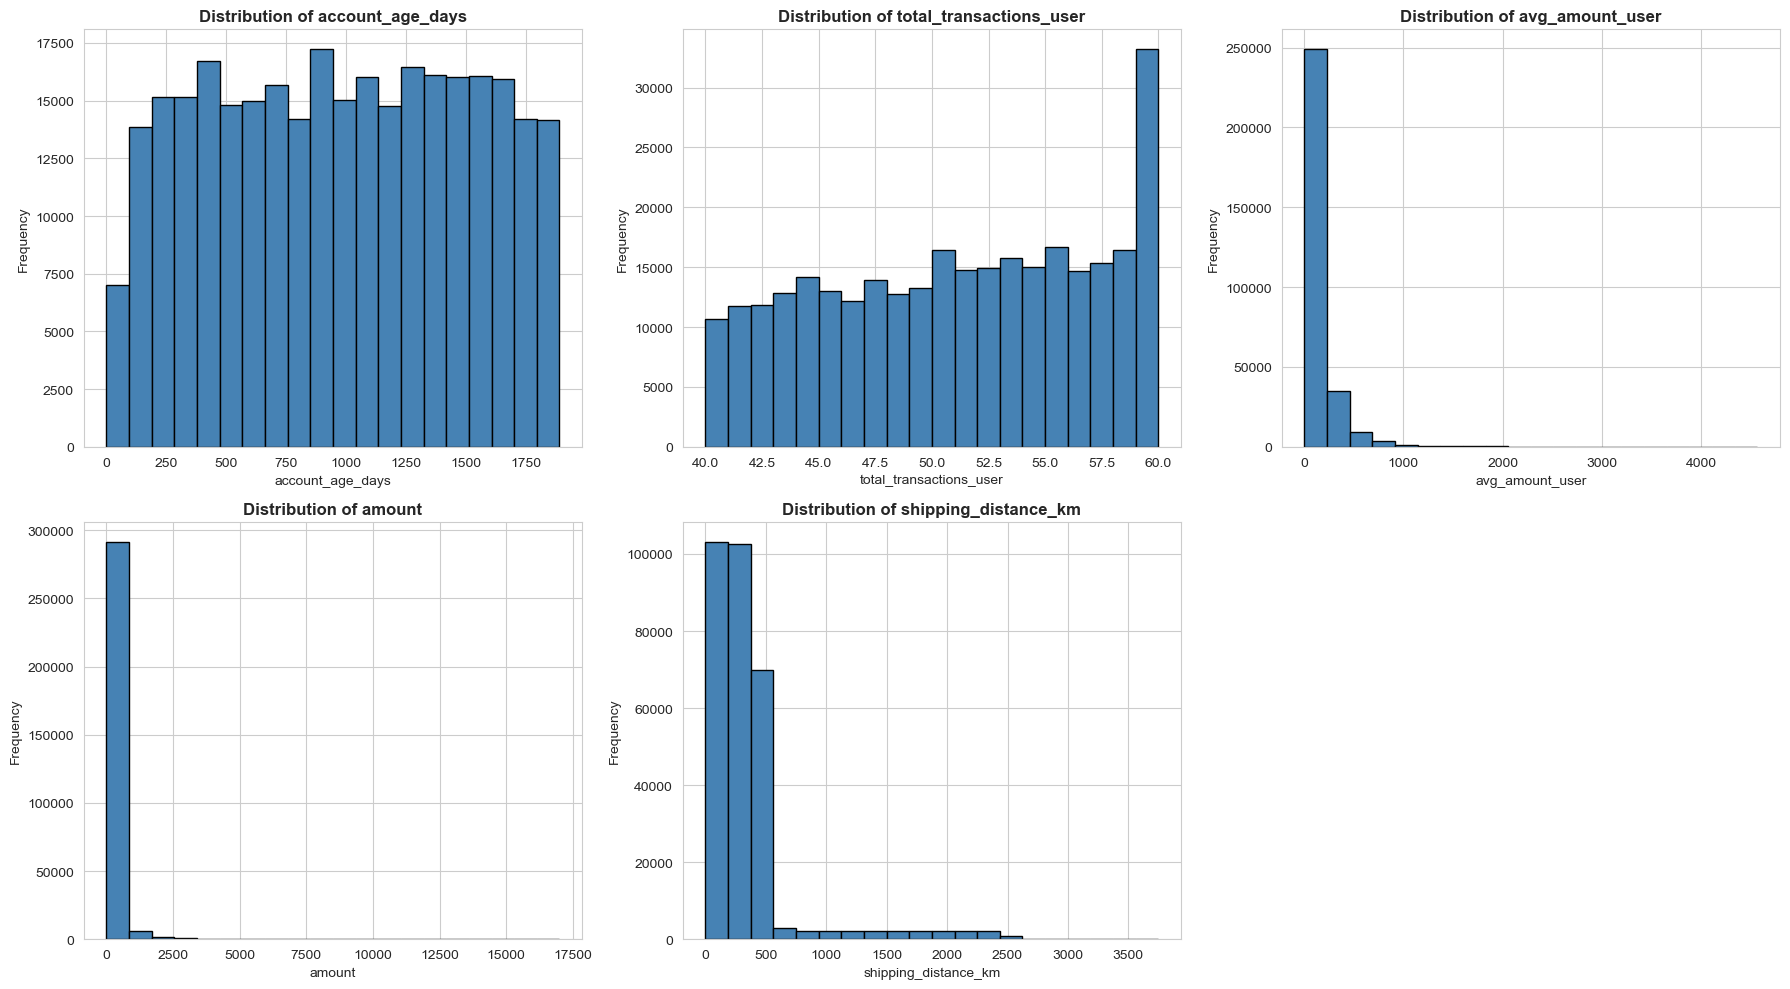

In [16]:
# Distribution of numerical features
numerical_features = ['account_age_days', 'total_transactions_user', 'avg_amount_user', 'amount', 'shipping_distance_km']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_features):
    axes[idx].hist(df_raw[col], bins=20, color='steelblue', edgecolor='black')
    axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

# Hide the extra subplot
axes[5].set_visible(False)

plt.tight_layout()
plt.show()

### 3.5 Box Plots for Outlier Detection

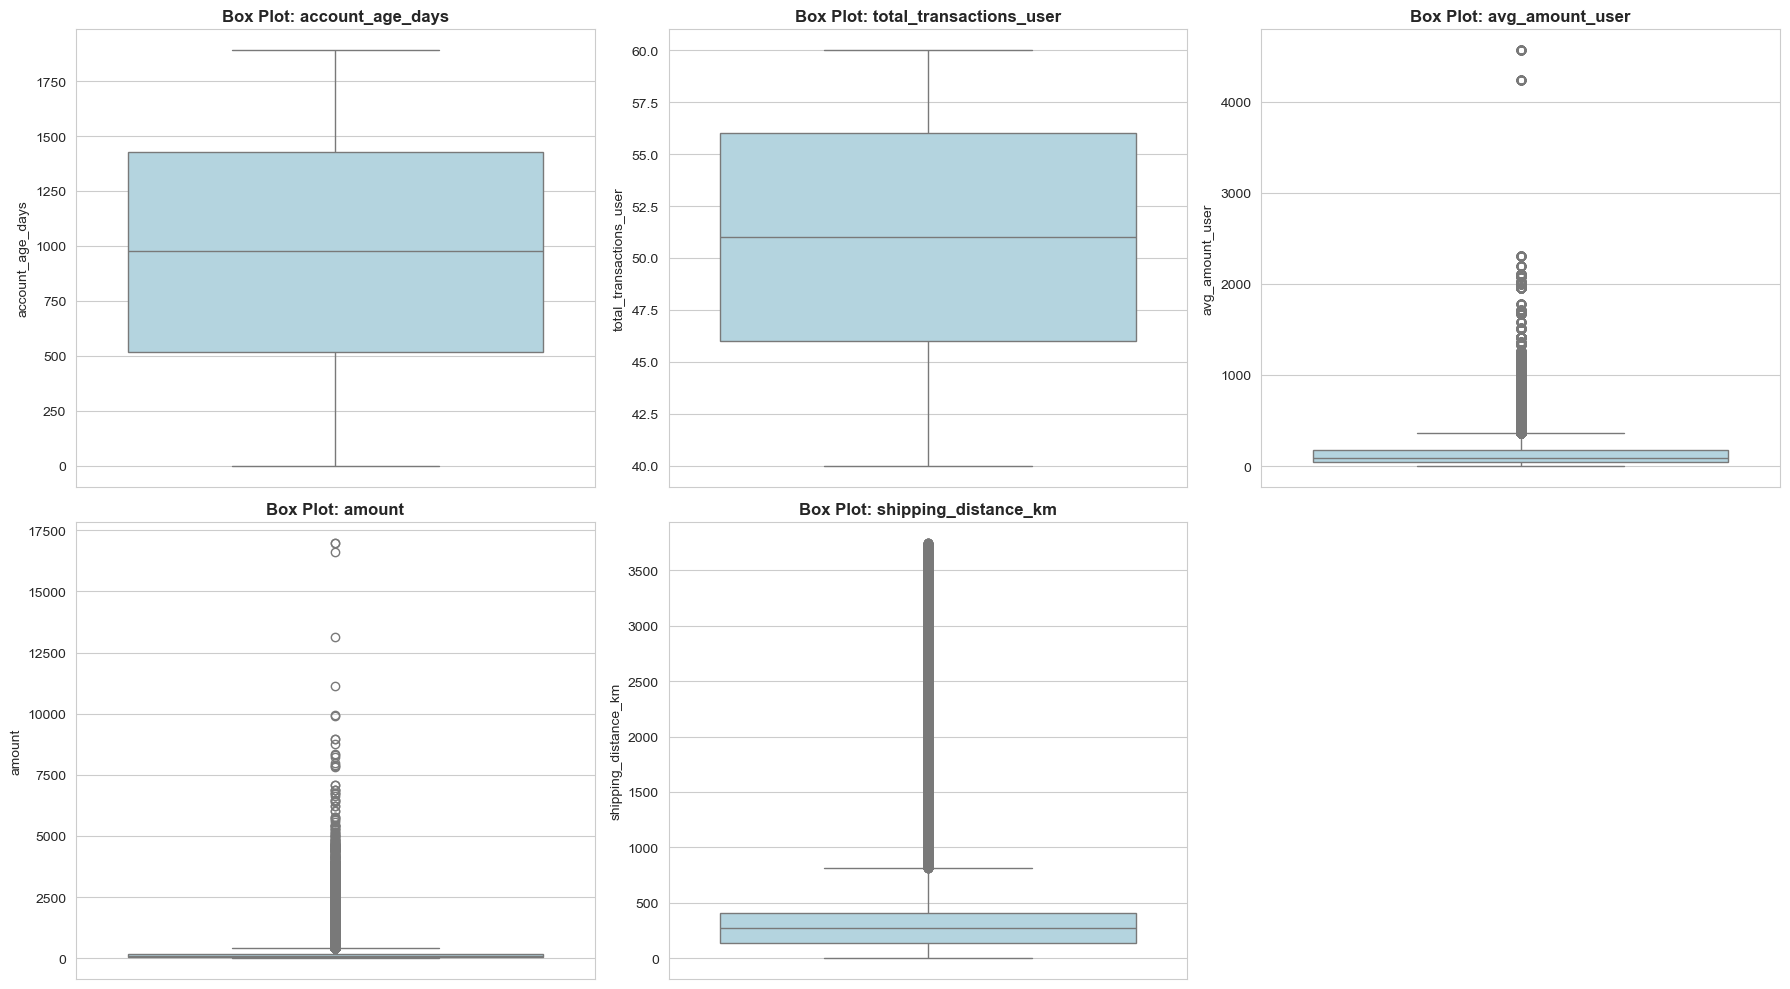

In [18]:
# Box plots for outlier detection
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_features):
    sns.boxplot(data=df_raw, y=col, ax=axes[idx], color='lightblue')
    axes[idx].set_title(f'Box Plot: {col}', fontsize=12, fontweight='bold')

# Hide the extra subplot
axes[5].set_visible(False)

plt.tight_layout()
plt.show()

### 3.6 Correlation Analysis

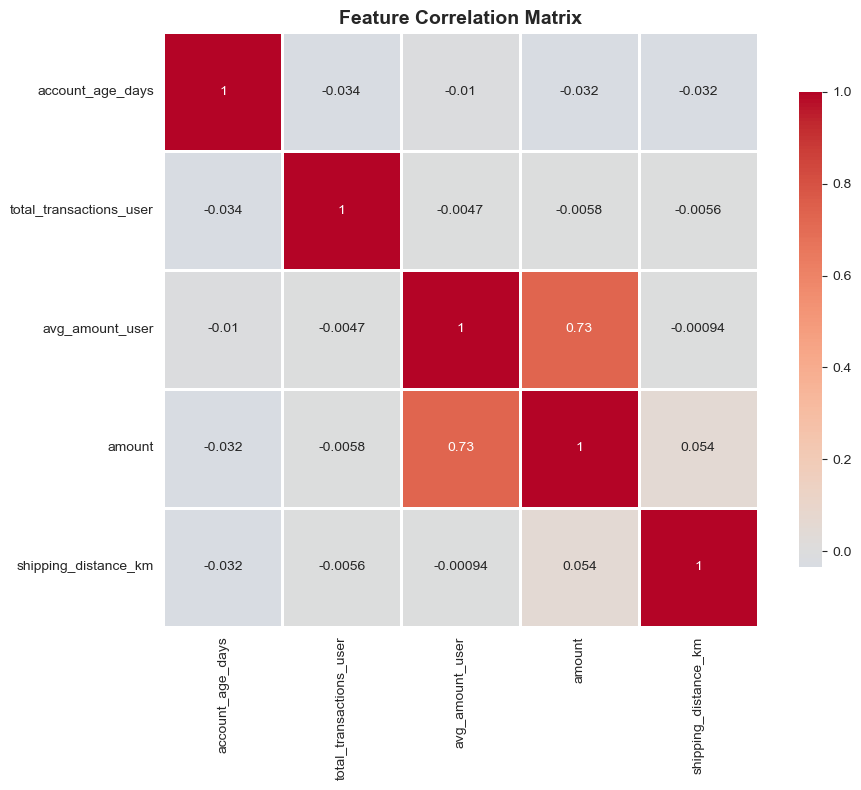

Correlation Matrix:
                         account_age_days  total_transactions_user  \
account_age_days                 1.000000                -0.034347   
total_transactions_user         -0.034347                 1.000000   
avg_amount_user                 -0.009951                -0.004743   
amount                          -0.032084                -0.005819   
shipping_distance_km            -0.031924                -0.005559   

                         avg_amount_user    amount  shipping_distance_km  
account_age_days               -0.009951 -0.032084             -0.031924  
total_transactions_user        -0.004743 -0.005819             -0.005559  
avg_amount_user                 1.000000  0.731955             -0.000942  
amount                          0.731955  1.000000              0.053686  
shipping_distance_km           -0.000942  0.053686              1.000000  


In [20]:
# Correlation matrix
correlation_matrix = df_raw[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("Correlation Matrix:")
print(correlation_matrix)

### 3.7 Pair Plot by Fraud Status

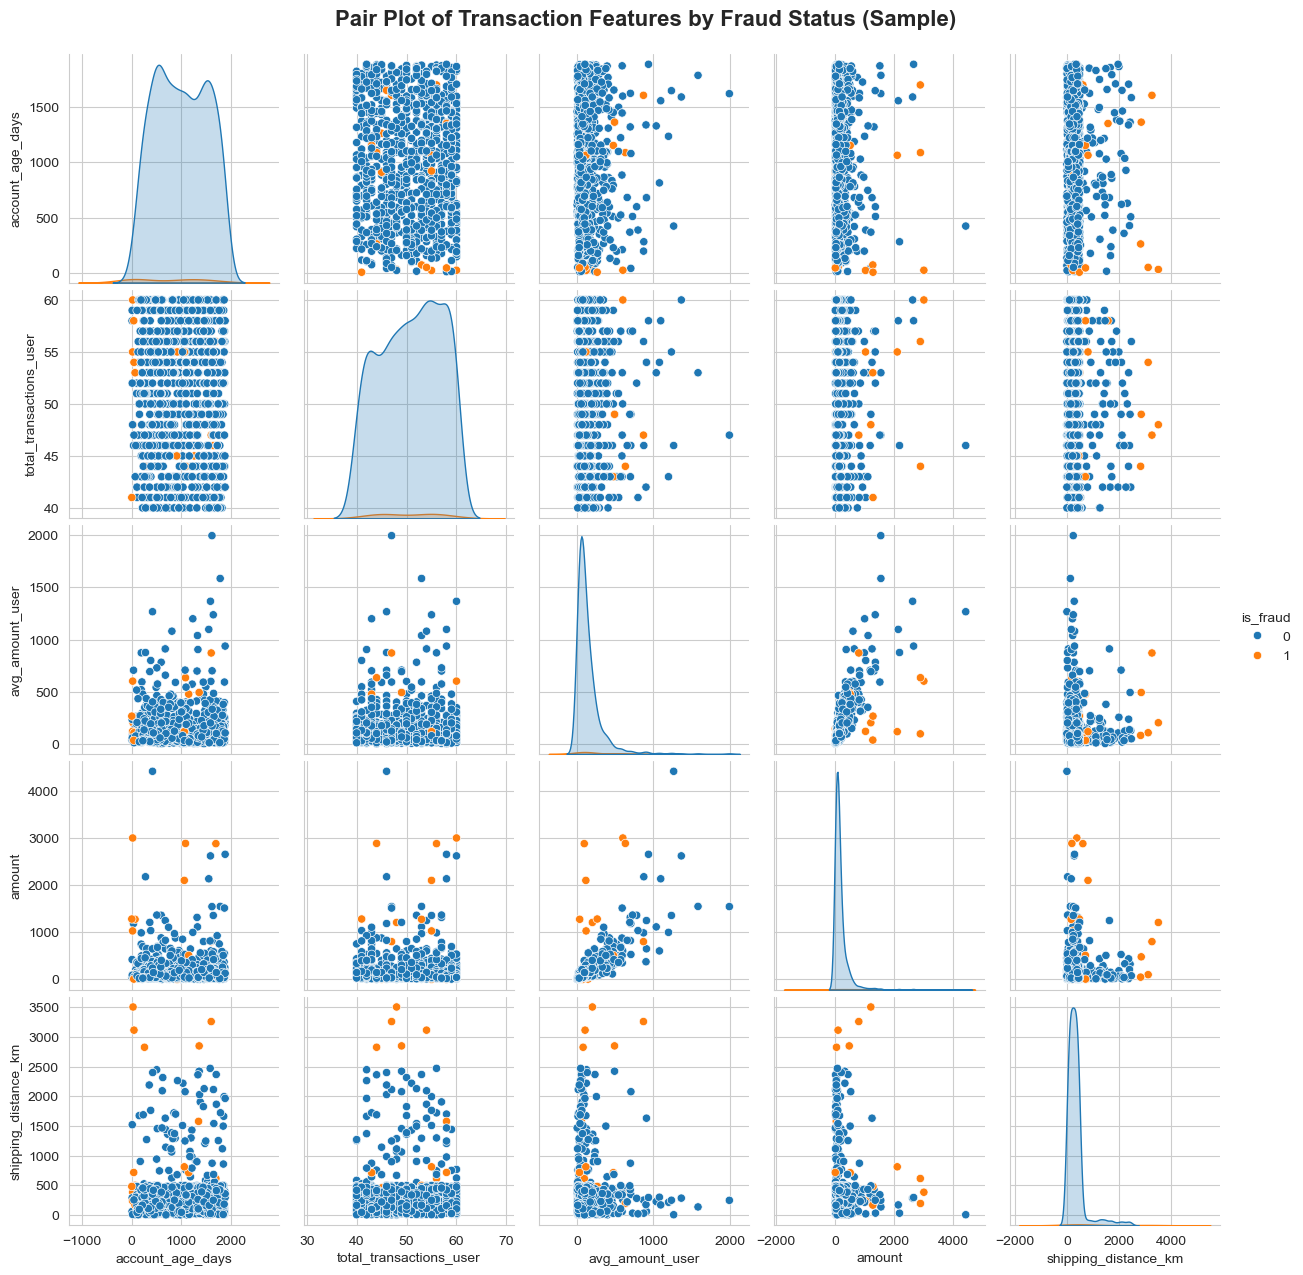

In [22]:
# Pair plot (using a sample for performance with large dataset)
sample_df = df_raw.sample(n=min(1000, len(df_raw)), random_state=42)
sns.pairplot(sample_df[numerical_features + ['is_fraud']], hue='is_fraud', height=2.5, diag_kind='kde')
plt.suptitle('Pair Plot of Transaction Features by Fraud Status (Sample)', y=1.02, fontsize=16, fontweight='bold')
plt.show()

### 3.8 Feature Statistics by Fraud Status

In [24]:
# Group statistics by fraud status
print("Feature Statistics by Fraud Status:")
print("="*80)
print(df_raw.groupby('is_fraud')[numerical_features].mean())

print("\nStandard Deviation by Fraud Status:")
print("="*80)
print(df_raw.groupby('is_fraud')[numerical_features].std())

Feature Statistics by Fraud Status:
          account_age_days  total_transactions_user  avg_amount_user  \
is_fraud                                                               
0               982.891642                50.688665       148.180170   
1               552.577737                49.993194       146.494155   

              amount  shipping_distance_km  
is_fraud                                    
0         167.829976            339.704956  
1         590.961199           1125.841016  

Standard Deviation by Fraud Status:
          account_age_days  total_transactions_user  avg_amount_user  \
is_fraud                                                               
0               519.370380                 5.973937       200.843570   
1               605.554976                 6.045668       177.849561   

              amount  shipping_distance_km  
is_fraud                                    
0         273.644198            383.750165  
1         880.753262           107

## 4. Data Preprocessing

### 4.1 Create a Copy for Preprocessing

In [27]:
# Create a copy for preprocessing
df = df_raw.copy()
print(f"Working with a copy of the dataset. Shape: {df.shape}")

Working with a copy of the dataset. Shape: (299695, 17)


### 4.2 Handle Missing Values (if any)

In [29]:
# Check and handle missing values
if df.isnull().sum().sum() > 0:
    print("Handling missing values...")
    # For numerical features, fill with median
    for col in numerical_features:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].median(), inplace=True)
    print("Missing values handled.")
else:
    print("No missing values found. Proceeding...")

No missing values found. Proceeding...


### 4.3 Remove Duplicates (if any)

In [31]:
# Remove duplicates
before_duplicates = df.shape[0]
df = df.drop_duplicates()
after_duplicates = df.shape[0]

print(f"Removed {before_duplicates - after_duplicates} duplicate rows.")
print(f"Dataset shape after removing duplicates: {df.shape}")

Removed 0 duplicate rows.
Dataset shape after removing duplicates: (299695, 17)


### 4.4 Feature Engineering

In [33]:
# Create new features
df['amount_transactions_product'] = df['amount'] * df['total_transactions_user']
df['amount_avg_product'] = df['amount'] * df['avg_amount_user']
df['amount_avg_ratio'] = df['amount'] / df['avg_amount_user']
df['shipping_age_ratio'] = df['shipping_distance_km'] / (df['account_age_days'] + 1)

print("New features created:")
print("- amount_transactions_product")
print("- amount_avg_product")
print("- amount_avg_ratio")
print("- shipping_age_ratio")
print(f"\nNew dataset shape: {df.shape}")

New features created:
- amount_transactions_product
- amount_avg_product
- amount_avg_ratio
- shipping_age_ratio

New dataset shape: (299695, 21)


### 4.5 Label Encoding for Target Variable

In [35]:
# Label encoding for is_fraud
label_encoder = LabelEncoder()
df['target_encoded'] = label_encoder.fit_transform(df['is_fraud'])

print("Label Encoding Mapping:")
for idx, label in enumerate(label_encoder.classes_):
    print(f"{label}: {idx}")

Label Encoding Mapping:
0: 0
1: 1


### 4.6 Feature Scaling

In [37]:
# Prepare features for scaling
feature_columns = ['account_age_days', 'total_transactions_user', 'avg_amount_user', 
                   'amount', 'shipping_distance_km',
                   'amount_transactions_product', 'amount_avg_product', 
                   'amount_avg_ratio', 'shipping_age_ratio']

# Create a scaler
scaler = StandardScaler()

# Fit and transform the features
df_scaled = df.copy()
df_scaled[feature_columns] = scaler.fit_transform(df[feature_columns])

print("Features scaled using StandardScaler")
print("\nScaled features (first 5 rows):")
print(df_scaled[feature_columns].head())

Features scaled using StandardScaler

Scaled features (first 5 rows):
   account_age_days  total_transactions_user  avg_amount_user    amount  \
0         -1.584794                 -0.61464        -0.001063 -0.301100   
1         -1.584794                 -0.61464        -0.001063 -0.225674   
2         -1.584794                 -0.61464        -0.001063 -0.276305   
3         -1.584794                 -0.61464        -0.001063 -0.210785   
4         -1.584794                 -0.61464        -0.001063 -0.144189   

   shipping_distance_km  amount_transactions_product  amount_avg_product  \
0              0.032504                    -0.319380           -0.105761   
1             -0.485020                    -0.249651           -0.099593   
2             -0.451209                    -0.296458           -0.103733   
3              0.094350                    -0.235886           -0.098375   
4              1.352045                    -0.174320           -0.092930   

   amount_avg_ratio  s

### 4.7 Train-Test Split

In [39]:
# Prepare X and y
X = df_scaled[feature_columns]
y = df_scaled['target_encoded']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train-Test Split:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"\nFeatures: {X_train.shape[1]}")
print(f"\nClass distribution in training set:")
print(y_train.value_counts().sort_index())
print(f"\nClass distribution in testing set:")
print(y_test.value_counts().sort_index())

Train-Test Split:
Training set: 239756 samples
Testing set: 59939 samples

Features: 9

Class distribution in training set:
target_encoded
0    234466
1      5290
Name: count, dtype: int64

Class distribution in testing set:
target_encoded
0    58617
1     1322
Name: count, dtype: int64


### 4.8 Save Preprocessed Data

In [41]:
# Save the preprocessed dataset
df_preprocessed = df_scaled.copy()
df_preprocessed.to_csv('transactions_preprocessing.csv', index=False)

print("Preprocessed dataset saved to: transactions_preprocessing.csv")
print(f"Shape: {df_preprocessed.shape}")
print("\nFirst few rows of preprocessed data:")
print(df_preprocessed.head())

Preprocessed dataset saved to: transactions_preprocessing.csv
Shape: (299695, 22)

First few rows of preprocessed data:
   transaction_id  user_id  account_age_days  total_transactions_user  \
0               1        1         -1.584794                 -0.61464   
1               2        1         -1.584794                 -0.61464   
2               3        1         -1.584794                 -0.61464   
3               4        1         -1.584794                 -0.61464   
4               5        1         -1.584794                 -0.61464   

   avg_amount_user    amount country bin_country channel merchant_category  \
0        -0.001063 -0.301100      FR          FR     web            travel   
1        -0.001063 -0.225674      FR          FR     web            travel   
2        -0.001063 -0.276305      FR          FR     app            travel   
3        -0.001063 -0.210785      FR          FR     web           fashion   
4        -0.001063 -0.144189      FR          US   

## 5. Summary

In [43]:
print("="*80)
print("PREPROCESSING SUMMARY")
print("="*80)
print(f"Original dataset shape: {df_raw.shape}")
print(f"Preprocessed dataset shape: {df_preprocessed.shape}")
print(f"\nOriginal features: {len(numerical_features)}")
print(f"Total features after engineering: {len(feature_columns)}")
print(f"New features created: {len(feature_columns) - len(numerical_features)}")
print(f"\nMissing values: {df_preprocessed.isnull().sum().sum()}")
print(f"Duplicates: {df_preprocessed.duplicated().sum()}")
print(f"\nTraining samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")
print(f"\nTarget classes: {label_encoder.classes_.tolist()}")
print("\nPreprocessing steps completed:")
print("✓ Data loading")
print("✓ Exploratory Data Analysis")
print("✓ Missing value handling")
print("✓ Duplicate removal")
print("✓ Feature engineering")
print("✓ Label encoding")
print("✓ Feature scaling")
print("✓ Train-test split")
print("✓ Data saved")
print("="*80)

PREPROCESSING SUMMARY
Original dataset shape: (299695, 17)
Preprocessed dataset shape: (299695, 22)

Original features: 5
Total features after engineering: 9
New features created: 4

Missing values: 0
Duplicates: 0

Training samples: 239756
Testing samples: 59939

Target classes: [0, 1]

Preprocessing steps completed:
✓ Data loading
✓ Exploratory Data Analysis
✓ Missing value handling
✓ Duplicate removal
✓ Feature engineering
✓ Label encoding
✓ Feature scaling
✓ Train-test split
✓ Data saved
